<a href="https://colab.research.google.com/github/kanishka-rani-2005/Deep_Learning/blob/main/IPL_Score_Predictor/IplScorePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IPL Score Prediction**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

In [10]:
data=pd.read_csv('ipl_data.csv')
data.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


# **EXPLORATORY DATA ANALYSIS**

In [11]:
data.duplicated().sum()

np.int64(0)

<ipython-input-12-6a46201bedbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_per_venue.values,y=matches_per_venue.index,palette='rainbow')


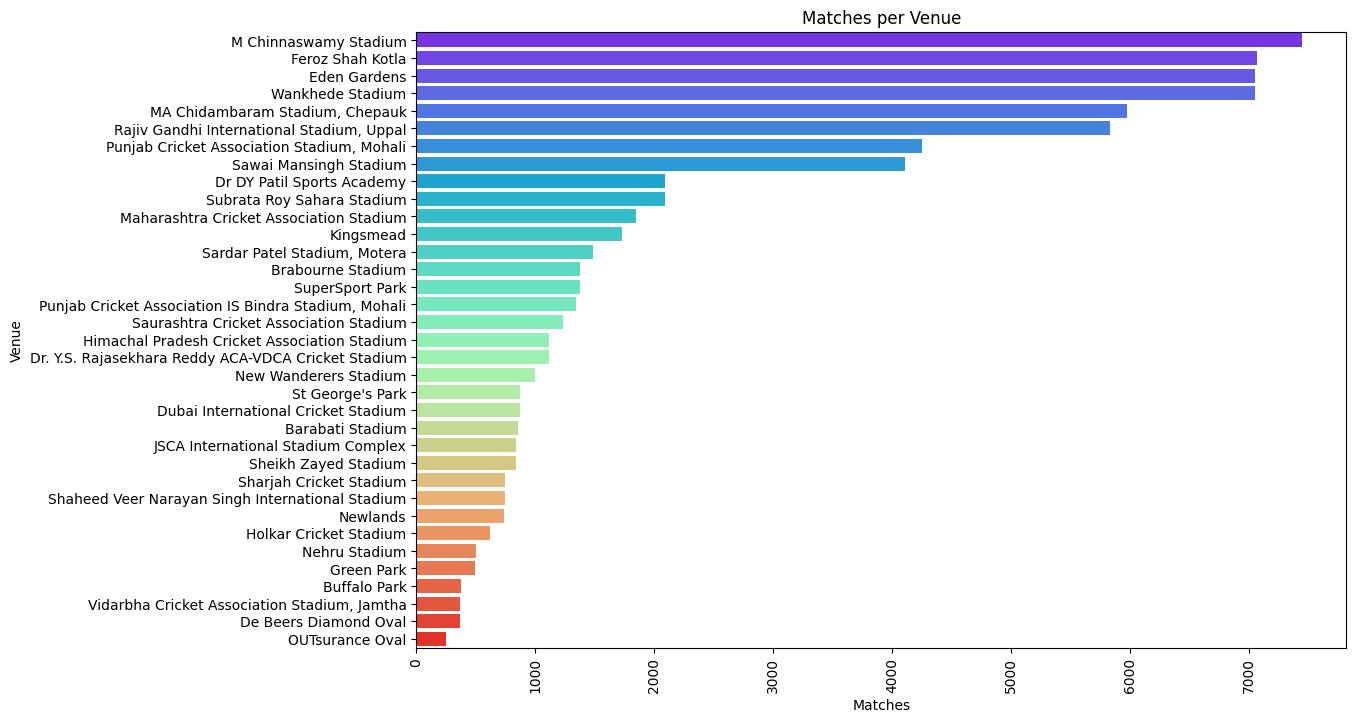

In [12]:
matches_per_venue=data['venue'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=matches_per_venue.values,y=matches_per_venue.index,palette='rainbow')
plt.title('Matches per Venue')
plt.xlabel('Matches')
plt.ylabel('Venue')
plt.xticks(rotation=90)
plt.show()

<ipython-input-13-ca460b0a9df9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette='pastel')


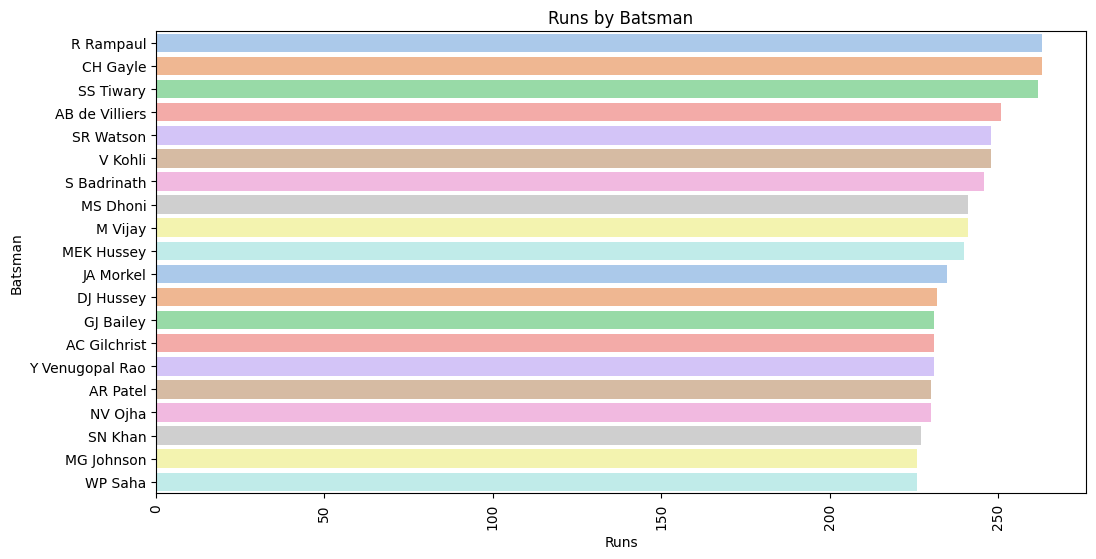

In [13]:
runs_by_batsman=data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette='pastel')
plt.title('Runs by Batsman')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.xticks(rotation=90)
plt.show()

<ipython-input-14-86aa0230e415>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowlers.values,y=wickets_by_bowlers.index,palette='pastel')


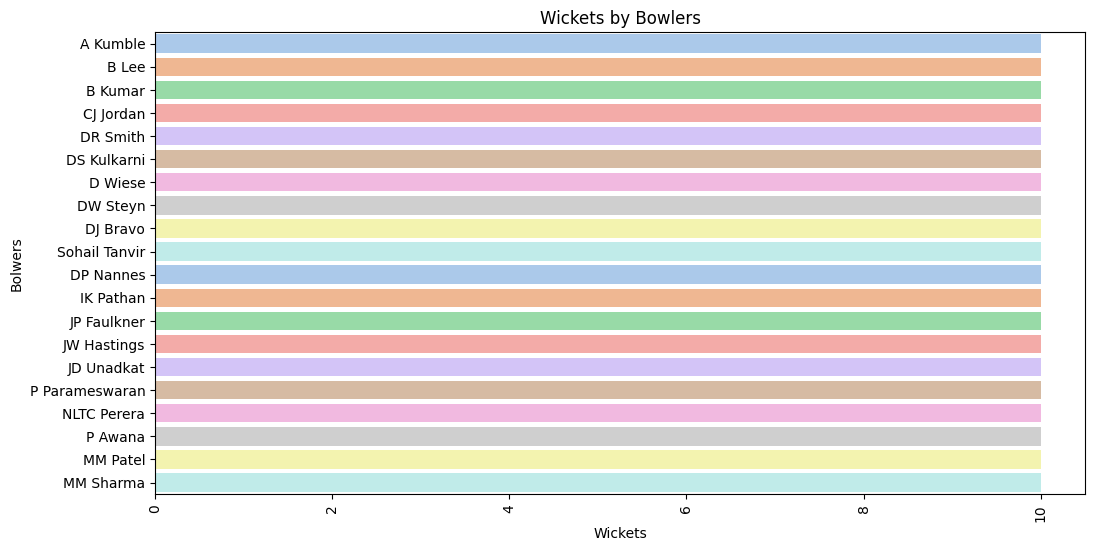

In [14]:
wickets_by_bowlers=data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowlers.values,y=wickets_by_bowlers.index,palette='pastel')
plt.title('Wickets by Bowlers')
plt.xlabel('Wickets')
plt.ylabel('Bolwers')
plt.xticks(rotation=90)
plt.show()

# **Performing Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder

cat_cols=['venue','batsman','bowler','bowl_team','bat_team']

data_encoder=data.copy()

label_encoder={}
for col in cat_cols:
  le=LabelEncoder()
  data_encoder[col]=le.fit_transform(data[col])
  label_encoder[col]=le

# **Train Test Split**

---



In [18]:
features_names=['bat_team','batsman','bowl_team','bowler','runs','wickets','venue','overs','striker']
X=data_encoder[features_names]
y=data_encoder['total']


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60811, 9) (15203, 9) (60811,) (15203,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **Building Neural Network**

In [20]:
from keras.layers import Dense,Input

In [34]:
model=keras.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))



In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,705 (534.00 KB)

 Trainable params: 136,705 (534.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [37]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [38]:
his=model.fit(X_train,y_train,epochs=20,batch_size=128
              ,validation_data=(X_test,y_test),
              callbacks=[early_stop]
              )


Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 87s 8ms/step - loss: 7954.5718 - mae: 66.0605 - val_loss: 471.0716 - val_mae: 16.5833
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 467.2894 - mae: 16.4120 - val_loss: 419.0326 - val_mae: 15.2893
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 438.1478 - mae: 15.6036 - val_loss: 403.3028 - val_mae: 14.8674
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 424.2300 - mae: 15.2458 - val_loss: 400.0378 - val_mae: 14.7615
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 422.2874 - mae: 15.1748 - val_loss: 399.8565 - val_mae: 14.7601
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 424.8169 - mae: 15.2242 - val_loss: 397.5981 - val_mae: 14.7397
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 423.8958 - mae: 15.1869 - val_loss: 418.4101 - val_mae: 15.2348
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 416.7592 - mae: 15.0877 - val_loss: 397.4800 - val_mae: 14.7469
Epo

In [39]:
his.history

{'loss': [2906.213134765625,
  458.7652587890625,
  432.81317138671875,
  424.04217529296875,
  421.83056640625,
  420.98834228515625,
  421.02069091796875,
  419.4695129394531,
  417.9443054199219,
  420.0088195800781,
  415.8811950683594,
  417.20703125,
  415.0540771484375,
  414.35784912109375,
  412.55340576171875,
  411.26214599609375,
  405.1135559082031,
  401.920654296875,
  399.423828125,
  399.14447021484375],
 'mae': [35.43808364868164,
  16.15838050842285,
  15.477710723876953,
  15.238787651062012,
  15.173474311828613,
  15.156034469604492,
  15.16875171661377,
  15.133528709411621,
  15.098014831542969,
  15.15870189666748,
  15.057491302490234,
  15.101489067077637,
  15.053110122680664,
  15.051627159118652,
  15.007817268371582,
  14.985559463500977,
  14.816006660461426,
  14.722613334655762,
  14.659523963928223,
  14.654655456542969],
 'val_loss': [471.0716247558594,
  419.0325927734375,
  403.3027648925781,
  400.03778076171875,
  399.8564758300781,
  397.5980834

<Axes: >

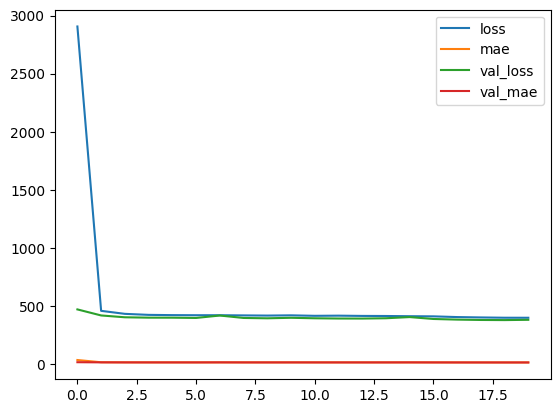

In [40]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [41]:
y_pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE: 14.345261573791504
MSE: 381.5504455566406
RMSE: 19.533316296948673


In [42]:
model.save('ipl_score_predictor.h5')

In [43]:
import pickle
with open('label_encoder.pkl','wb') as f:
  pickle.dump(label_encoder,f)

with open ('scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

In [44]:
import pickle
with open('ipl_score_model.pkl','wb') as f:
  pickle.dump(model,f)